# 선물 수익률 계산

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import FinanceDataReader as fdr
import seaborn as sns
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import matplotlib.font_manager as fm
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams["figure.figsize"] = (14,4)
mpl.rcParams['axes.grid'] = True 
path = 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# plt.title('한글제목')
# plt.show()

NanumGothic


In [3]:
def myplot(df, nrows=5,  kind='line', title='제목', labels=False):  
    if nrows > 0:
        print(df.head(nrows))
    else:
        print(df.tail(nrows))
    
    if labels:
        cols = df.columns
        for i, col in enumerate(cols):
            df[col].plot(label=labels[i], kind=kind)
    else :
        df.plot(kind=kind)
    
    plt.title(title)
    plt.legend()
    plt.show()

In [4]:
def myplotmix(df1, df2, y1='ylabel-1', y2='ylabel-2', kind1='bar', kind2='line', title='제목',  nrows1=5, nrows2=5,  labels=False):  
    ytl=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    if nrows1 > 0:
        print(df1.head(nrows1))
    elif nrows1 < 0:
        print(df1.tail(nrows1))
    if nrows2 > 0:
        print(df2.head(nrows2))
    else:
        print(df2.tail(nrows2))
    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax2=ax1.twinx()
    if kind1 == 'line':
        df1.plot(kind=kind1, ax=ax2, marker='d',color='#e35f62')  #color='y', 
        df2.plot(kind=kind2, ax=ax1)  #bar
    else:
        df1.plot(kind=kind1, ax=ax1,color='#bcbd22')
        df2.plot(kind=kind2, ax=ax2) #color='y',
        
    # df['date'] = df['date'].dt.strftime('%Y-%m-%d')
    # ax1.set_xticklabels(df['date'])    
    ax1.yaxis.tick_right()
    ax2.yaxis.tick_left()
    ax1.set_ylabel(y1) #, color='red')
    ax2.set_ylabel(y2) #, color='red')
    ax1.legend(loc=1)
    ax2.legend(loc=2)
    plt.title(title)
    ax1.grid(False)
    ax2.grid(False)
    plt.show()

In [5]:
# Date	Spot	Front	Second
# M M1 M2 EXP  Last Trade



In [23]:

df = pd.read_excel('./datasets/WTI선물.xlsx', sheet_name='M', index_col='Date', )
edf = pd.read_excel('./datasets/WTI선물.xlsx', sheet_name='EXP')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2017-12-28 to 2010-01-04
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Spot    2014 non-null   float64
 1   Front   2014 non-null   float64
 2   Second  2014 non-null   float64
dtypes: float64(3)
memory usage: 62.9 KB


In [8]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ticker      293 non-null    object        
 1   Month       293 non-null    datetime64[ns]
 2   Last Trade  293 non-null    object        
 3   Last Price  223 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 9.3+ KB


# 이론가 산출
* 이론가  = 지수*가격*e(cd금리)t

In [9]:
temp = pd.DataFrame({
                    'date':pd.date_range('2021-01-04',periods=4),
                   'a': [100,101,102,103]   ,
                   'b':[1,1,1,1]
                })

temp['date']  = pd.to_datetime(temp['date'] , format='%Y-%m-%d', errors='raise')
temp = temp.set_index('date')
print(temp.info())
print(temp.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2021-01-04 to 2021-01-07
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       4 non-null      int64
 1   b       4 non-null      int64
dtypes: int64(2)
memory usage: 96.0 bytes
None
              a  b
date              
2021-01-04  100  1
2021-01-05  101  1
2021-01-06  102  1
2021-01-07  103  1


In [10]:
# by 김한결
def 이론가(선물지수, 이자율, 배당률, 오늘, 만기일):
    list=[]
#     잔존만기일 = np.busday_count(오늘, 만기일) / 252
    만기디데이 = np.busday_count(오늘, 만기일)
    for i in range(만기디데이,0,-1):
        잔존일수 = i/252
        선물이론가 = 선물지수 * np.exp((이자율-배당률) * 잔존일수)
        list.append(선물이론가.values[만기디데이-i])
        df = pd.DataFrame(data=list)
    return df
이자율 = 0.0225
배당률 = 0.015

만기일 = '2021-01-08'
오늘 = '2021-01-04'
선물지수 = temp['a']
선물이론가 = 이론가(선물지수,이자율,배당률,오늘, 만기일)
선물이론가


,0
0,100.011905
1,101.009018
2,102.006072
3,103.003066


In [16]:
df.head()

,Spot,Front,Second
Date,,,
2017-12-28,59.84,59.84,59.87
2017-12-27,59.64,59.64,59.69
2017-12-26,59.97,59.97,60.00
2017-12-22,58.42,58.47,58.54
2017-12-21,58.33,58.36,58.40


In [17]:
edf.head()

,Ticker,Month,Last Trade,Last Price
0,CLG00,2000-02-01,01/20/00,29.66
1,CLH00,2000-03-01,02/22/00,29.62
2,CLJ00,2000-04-01,03/21/00,28.00
3,CLK00,2000-05-01,04/19/00,27.35
4,CLM00,2000-06-01,05/22/00,28.61


In [24]:
edf['Month'] = pd.to_datetime(edf['Month'])  #만기월최종거래일(last trading day)
edf = edf.set_index('Month')
edf.head()

,Ticker,Last Trade,Last Price
Month,,,
2000-02-01,CLG00,01/20/00,29.66
2000-03-01,CLH00,02/22/00,29.62
2000-04-01,CLJ00,03/21/00,28.00
2000-05-01,CLK00,04/19/00,27.35
2000-06-01,CLM00,05/22/00,28.61


In [26]:
print(edf.index.max() , edf.index.min())

2017-12-26 00:00:00 2000-02-01 00:00:00


In [27]:
print(df.index.max() , df.index.min())

2017-12-28 00:00:00 2010-01-04 00:00:00


In [32]:
edf.loc['2010-01-01':].shape

(282, 3)

In [33]:
df.
df.head()

,Spot,Front,Second
Date,,,
2017-12-28,59.84,59.84,59.87
2017-12-27,59.64,59.64,59.69
2017-12-26,59.97,59.97,60.00
2017-12-22,58.42,58.47,58.54
2017-12-21,58.33,58.36,58.40


In [34]:
edf.head()

,Ticker,Last Trade,Last Price
Month,,,
2000-02-01,CLG00,01/20/00,29.66
2000-03-01,CLH00,02/22/00,29.62
2000-04-01,CLJ00,03/21/00,28.00
2000-05-01,CLK00,04/19/00,27.35
2000-06-01,CLM00,05/22/00,28.61


## 만기일 == 기준금리발표일

In [52]:
# gdf = pd.concat([df,edf], axis=1, join='outer')
# gdf.head()
# gdf['Spot'].shape
# gdf['Spot'].isna().sum()

# gdf['만기일1'] = gdf['Spot'].apply(lambda x: 1 if np.isnan(x) else 0)
# # gdf[gdf['만기일1']==1].shape
# gdf[gdf['만기일1']==1].shape

(102, 8)

In [50]:
df['exp'] = np.nan
cnt = 0
for d in df.index:
    if d in edf.index:
        df.loc[d]['exp'] = 1
        cnt = cnt + 1
df.head() 
print(cnt)

191


In [51]:
df.head()

,Spot,Front,Second,exp
Date,,,,
2017-12-28,59.84,59.84,59.87,NaN
2017-12-27,59.64,59.64,59.69,NaN
2017-12-26,59.97,59.97,60.00,1.0
2017-12-22,58.42,58.47,58.54,1.0
2017-12-21,58.33,58.36,58.40,1.0


In [54]:
df['exp'].fillna(0, inplace=True)
df.isna().sum()

Spot      0
Front     0
Second    0
exp       0
dtype: int64

In [55]:
df.head()

,Spot,Front,Second,exp
Date,,,,
2017-12-28,59.84,59.84,59.87,0.0
2017-12-27,59.64,59.64,59.69,0.0
2017-12-26,59.97,59.97,60.00,1.0
2017-12-22,58.42,58.47,58.54,1.0
2017-12-21,58.33,58.36,58.40,1.0


## 현물가

In [56]:
print(df.index.max() , df.index.min())

2017-12-28 00:00:00 2010-01-04 00:00:00


In [60]:
df.loc[df.index.max()]['Spot'] - df.loc[df.index.min()]['Spot'] 

-21.67

## 선물가 
* 만기일(exp==1)에는 롤오버가 발생
* 롤오버비용: 차월만기금(Second) - 당월만기금(Front)  

In [74]:
df[df['exp']==1].index.max(), df[df['exp']==1].index.min()

(Timestamp('2017-12-26 00:00:00'), Timestamp('2017-01-03 00:00:00'))

Text(0.5, 1.0, '롤오버 비용 증감지수')

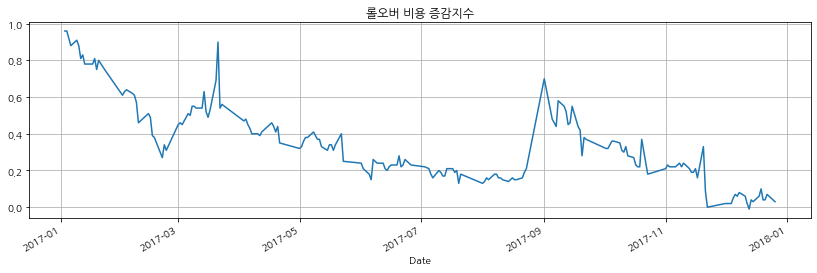

In [75]:
temp = df[df['exp']==1][['Second','Front']]
temp['diff'] =  temp['Second'] - temp['Front']
temp.head()
temp['diff'].plot()
plt.title("롤오버 지수 증감(원자료)")

In [66]:
rov_tot = np.array(df[df['exp']==1]['Second'] - df[df['exp']==1]['Front'] ).sum()
# 7년동안 매달 == 즉 84회 이자비용
rov_tot

66.14000000000003

In [67]:
df.loc[df.index.max()]['Spot'] - df.loc[df.index.min()]['Spot']  - rov_tot

-87.81000000000003

In [11]:
# by 장예지
def 이론가(선물지수, 이자율, 배당율, 만기일):
    # 잔존만기일 = np.busday_count(오늘, 만기일) / 252
    # print(잔존만기일*252)
    선물이론가 = 선물지수 * np.exp((이자율 - 배당율)* (np.busday_count(선물지수.index.values.astype('datetime64[D]'), 만기일) / 252))
    return 선물이론가

이자율 = 0.0225
배당률 = 0.015

만기일 = '2021-01-08'
오늘 = '2021-01-04'
선물지수 = temp['a']
선물이론가 = 이론가(선물지수,이자율,배당률, 만기일)
선물이론가

100.0119055
101.0090183
102.0060716
103.0030655


103.0030655

In [12]:
#𝑭 =𝑺𝒆^(𝒓−𝒅)𝒕   
def 이론가(선물지수, 이자율, 배당율, 만기일, 오늘):
    print(오늘)
    for d in 오늘:        
        잔존만기일 = np.busday_count(d, 만기일) / 252
        print(잔존만기일*252)
        선물이론가 = 선물지수 * np.exp((이자율 - 배당율)*잔존만기일)
        return 선물이론가

In [13]:
# # 𝑭 =𝑺[𝟏+(𝒓−𝒅)×𝒕/𝟑𝟔𝟓]
# def 이론가2(선물지수, 이자율, 배당율, 만기일, 오늘):
#     잔존만기일 = (만기일-오늘).days/365
#     print(잔존만기일)
#     선물이론가 = 선물지수 * (1+ (이자율 - 배당율)*잔존만기일)
#     return 선물이론가

In [14]:
# import datetime

# 이자율 = 0.0225
# 배당율 = 0.015
# # 2.25%
# # 1.50%
# 만기일 = '2021-01-08'  #63일
# 오늘 = '2021-01-07'

# 만기일 = pd.to_datetime(만기일)
# 오늘 = pd.to_datetime(오늘)
# # 오늘 = datetime.datetime.strptime(오늘, '%Y-%m-%d')
# print('Date-time:', 만기일)
# print('Date-time:', 오늘)

# 선물지수 = temp['a']
# res = 이론가2(선물지수, 이자율, 배당율, 만기일, 오늘)
# res

In [15]:
# 100.0119055
# 101.0090183
# 102.0060716
# 103.0030655
